In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [4]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [5]:
urunler=train["urun"].unique()

In [11]:
for urun in urunler:
    malzeme= train[train['urun'].isin([urun])]
    aylik_enflasyon=malzeme.groupby("tarih").mean()
    aylik_enflasyon["enflasyon"]=0
    aylik_enflasyon=aylik_enflasyon.drop("besin",axis=1)
for x in range(59):
    if x==59:
        aylik_enflasyon.iloc[x:y,2:3]=0
    else:
        y=x+1
        z=y+1
        aylik_enflasyon.iloc[x:y,1:2]=aylik_enflasyon.iloc[y:z,0:1].values/aylik_enflasyon.iloc[x:y,0:1].values

In [20]:
aylik_enflasyon

,fiyat,enflasyon
tarih,,
2016-01-01,18.120833,1.010152
2016-02-01,18.304792,1.012713
2016-03-01,18.537500,1.019375
2016-04-01,18.896667,1.015721
2016-05-01,19.193750,1.015836
2016-06-01,19.497708,1.027129
2016-07-01,20.026667,1.009623
2016-08-01,20.219375,1.010221
2016-09-01,20.426042,1.022867


In [19]:
enflasyon=aylik_enflasyon.drop("fiyat",axis=1)
enflasyon=enflasyon.iloc[:-1,:]

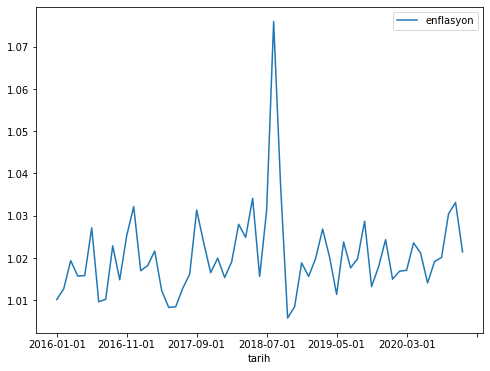

<Figure size 576x432 with 0 Axes>

In [16]:
enflasyon.plot(figsize = (8,6))
fig = pyplot.figure(figsize = (8,6))
pyplot.show()

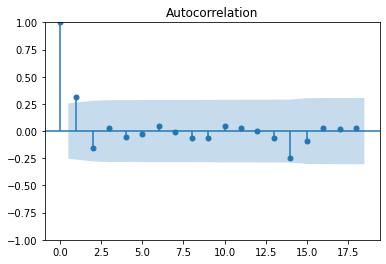

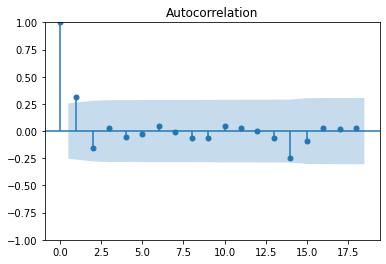

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(enflasyon)

In [22]:
X = enflasyon.values
train = X[0:50] # 27 data as train data
test = X[50:]  # 9 data as test data
predictions = []

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [69]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(0,0, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-319.9752268657188


In [70]:
predictions= model_arima_fit.forecast(steps=9)
predictions

array([1.02197535, 1.01999012, 1.02015423, 1.02015423, 1.02015423,
       1.02015423, 1.02015423, 1.02015423, 1.02015423])

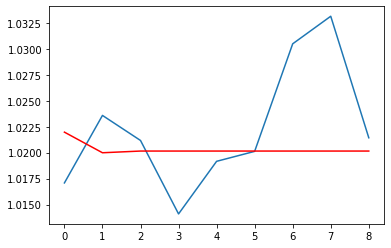

In [71]:
plt.plot(test)
plt.plot(predictions,color='red')

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

4.194916124458845e-05

In [48]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [49]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) -307.4861301266067
(0, 0, 1) -319.37744034884645
(0, 0, 2) -319.9752268657188
(0, 0, 3) -317.74130536482517
(0, 0, 4) -316.0202138471322
(0, 1, 0) -286.9552466670813
(0, 1, 1) -296.7149487709983
(0, 1, 2) -309.0341422564029
(0, 1, 3) -308.91223386372025
(0, 1, 4) -307.11851011382817
(0, 2, 0) -239.4892026729779
(0, 2, 1) -274.18226585894627
(0, 2, 2) -277.4432432294192
(0, 2, 3) -289.65667344109954
(0, 2, 4) -291.2060752760349
(0, 3, 0) -186.3942371558349
(0, 3, 1) -227.5473336605751
(0, 3, 2) -257.65279975949795
(0, 3, 3) -235.6770557067729
(0, 3, 4) -268.4291018940609
(0, 4, 0) -132.10106146618662
(0, 4, 1) -175.01267190456693
(0, 4, 2) -212.1761769384419
(0, 4, 3) -174.46755143709618
(0, 4, 4) -217.5951470879196
(1, 0, 0) -310.43949963923546
(1, 0, 1) -319.79004899082594
(1, 0, 2) -317.98870072027006
(1, 0, 3) -315.7515724858122
(1, 0, 4) -314.1860427347174
(1, 1, 0) -286.283498426294
(1, 1, 1) -299.95949971386506
(1, 1, 2) -309.0351853890123
(1, 1, 3) -307.0292120149027
(